# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 머신러닝!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 세 번째 마을 '머신러닝' 마을에 도착했습니다.
* 그럼, 지금부터 세 번째 드래곤볼을 찾아볼까요?

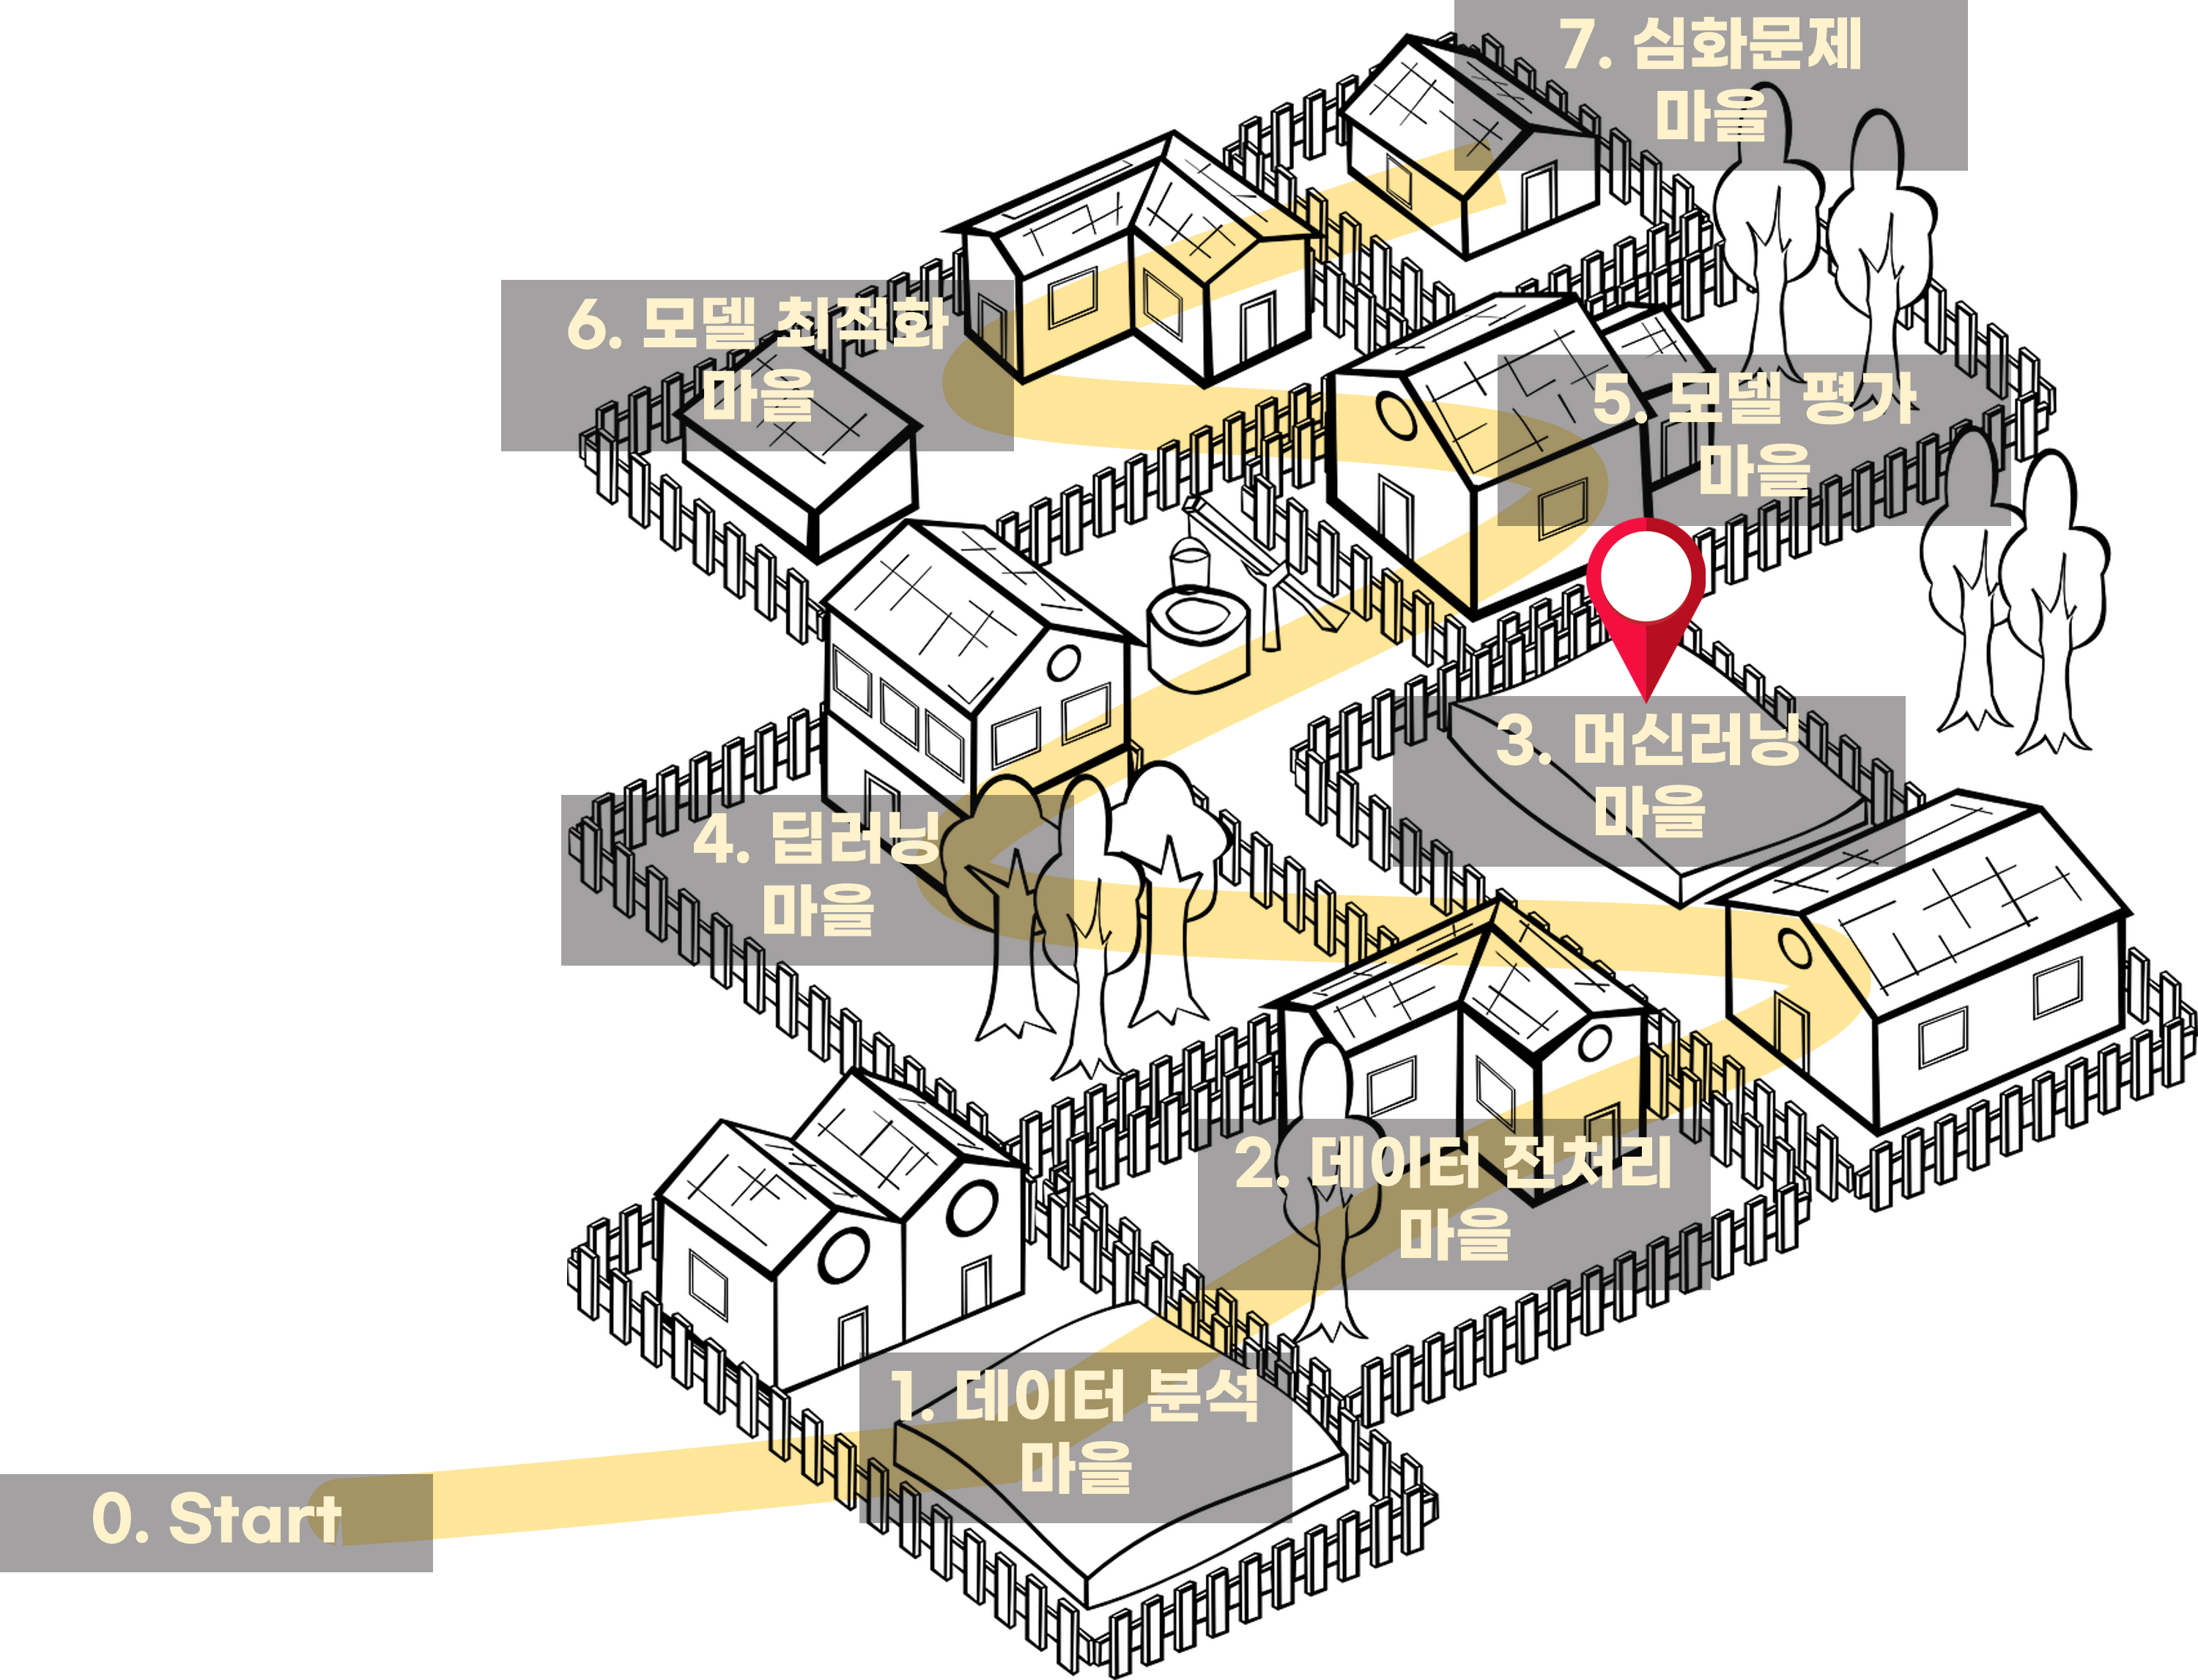

### [상황] 세 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [2]:
# ID를 입력해주세요.
# ID는 aivle 이메일의 아이디 d로 시작하는 7글자(예를 들어 d011001)
ID = "a021018"

---

# (실습준비) 데이터 불러오기부터

In [3]:
import pandas as pd

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

---

# 1. Train/Test Data Split
## Overfitting을 방지하기위해 우리는 데이터 셋을 분할합니다.
+ KeyPoint : 학습 대상으로 정제한 데이터를 Train/Test 데이터로 분할할 수 있다.

#### [실습문제1] 데이터 분할
* test데이터의 사이즈를 20%, random_state는 42로 데이터 셋을 분할해보세요.
* 변수명은 train_x, test_x, train_y, test_y로 지정
* 단서 : train_x 행(데이터) 수는?

In [25]:
# 아래에 실습코드를 작성하세요.
from sklearn.model_selection import train_test_split

In [26]:
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.2, random_state=42)

In [27]:
train_x.shape

(44346, 108)

In [28]:
# 아래에 단서를 적어주세요.
단서1 = "44346"# 단서1을 적어주세요.(문자형으로 적어주세요.)

---

In [30]:
# 모델 저장을 위해 폴더를 생성하겠습니다.
import os
 
if not os.path.exists("model"):
    os.makedirs("model")

---

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

### 가. LinearRegression 부터 시작해봅시다.
#### 통계와 기계학습에서 사용되는 전통적인 기법

#### [실습문제2] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 지정하지 않습니다.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : sklearn의 LinearRegression 라이브러리에서 모델을 학습시키는데 활용되는 메소드는?(Hint : 맞추다)

In [32]:
# 아래에 실습코드를 작성하세요.
from sklearn.linear_model import LinearRegression

In [60]:
LR_model = LinearRegression()

LR_model.fit(train_x, train_y)

LR_pred = LR_model.predict(test_x)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
print("RMSE : ", round(mean_squared_error(test_y, LR_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, LR_pred), 5))

RMSE :  279.3872
r2 score :  0.71081


In [46]:
# 아래에 단서를 적어주세요.
단서2 = "fit"# 단서2를 적어주세요.(문자형으로 적어주세요.)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언트부스팅, XG부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제3] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42 로 지정해주세요.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : Test set의 R-squared Score는?

In [49]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor

In [72]:
RF_model = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42)

RF_model.fit(train_x, train_y)

RF_pred = RF_model.predict(test_x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
print("RMSE : ", round(mean_squared_error(test_y, RF_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, RF_pred), 5))

RMSE :  284.83492
r2 score :  0.69942


In [78]:
# 아래에 단서를 적어주세요.
단서3 = "0.69942"# 단서3를 적어주세요.(문자형으로 적어주세요.)

#### [실습문제4] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
* 그리고 중요도 기준으로 상위 10위까지 변수를 정리해보세요.
* 단서 : 두번째로 중요한 변수는 무엇인가요?

In [86]:
# Feature의 중요도 확인
RF_model.feature_importances_

array([2.73511495e-04, 9.96499808e-01, 6.70563890e-04, 1.01799616e-05,
       5.44593238e-05, 2.50966911e-05, 2.97187301e-04, 1.13307119e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.05619219e-04,
       7.42486090e-05, 3.60776043e-05, 0.00000000e+00, 0.00000000e+00,
       7.82501725e-06, 8.23397173e-06, 0.00000000e+00, 1.47649652e-05,
       1.01913456e-05, 1.06591027e-04, 3.28626862e-04, 5.13623436e-05,
       5.10111312e-05, 2.12072399e-05, 4.40921695e-06, 0.00000000e+00,
       3.33424248e-06, 2.12401127e-05, 0.00000000e+00, 0.00000000e+00,
       2.76440398e-04, 1.84221210e-05, 0.00000000e+00, 9.49335571e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.34733453e-06, 2.82598047e-06, 5.35059009e-06,
       0.00000000e+00, 3.75691632e-06, 0.00000000e+00, 0.00000000e+00,
       1.43960287e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [84]:
train_x.columns

Index(['A_DISTANCE', 'ETA', 'signaltype', 'WEEKDAY_0', 'WEEKDAY_1',
       'WEEKDAY_2', 'WEEKDAY_3', 'WEEKDAY_4', 'HOUR_0', 'HOUR_1',
       ...
       'level2_pnu_의정부시', 'level2_pnu_이천시', 'level2_pnu_종로구', 'level2_pnu_중구',
       'level2_pnu_중랑구', 'level2_pnu_파주시', 'level2_pnu_평택시', 'level2_pnu_포천시',
       'level2_pnu_하남시', 'level2_pnu_화성시'],
      dtype='object', length=108)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    #plt.figure(figsize=(10,8))
    #sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    #plt.xlabel('FEATURE IMPORTANCE')
    #plt.ylabel('FEATURE NAMES')
    #plt.grid()

    return fi_df

In [103]:
plot_feature_importance(RF_model.feature_importances_, train_x.columns)

,feature_names,feature_importance
0,ETA,0.996500
1,signaltype,0.000671
2,HOUR_7,0.000606
3,HOUR_18,0.000329
4,WEEKDAY_3,0.000297
...,...,...
103,HOUR_10,0.000000
104,level2_pnu_성남시 수정구,0.000000
105,level2_pnu_성남시 중원구,0.000000
106,level2_pnu_가평군,0.000000


In [100]:
# 아래에 단서를 적어주세요.
단서4 = "signaltype" # 단서4를 적어주세요.(문자형으로 적어주세요.)

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제5] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42 로 지정해주세요.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : Test set의 RMSE는?

In [104]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
GB_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42)

GB_model.fit(train_x, train_y)

GB_pred = GB_model.predict(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [110]:
print("RMSE : ", round(mean_squared_error(test_y, GB_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, GB_pred), 5))

RMSE :  276.47308
r2 score :  0.71681


In [113]:
# 아래에 단서를 적어주세요.
단서5 = "276.47308"# 단서5를 적어주세요.(문자형으로 적어주세요.)

#### [실습문제6] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
* 그리고 중요도 기준으로 상위 10위까지 변수를 정리해보세요.
* 단서 : 세번째로 중요한 변수는 무엇인가요?

In [115]:
# Feature의 중요도 확인
plot_feature_importance(GB_model.feature_importances_, train_x.columns)

,feature_names,feature_importance
0,ETA,0.961136
1,signaltype,0.005465
2,A_DISTANCE,0.004566
3,WEEKDAY_3,0.003072
4,HOUR_7,0.002451
...,...,...
103,level2_pnu_고양시 일산서구,0.000000
104,level2_pnu_안양시 동안구,0.000000
105,level2_pnu_안양시 만안구,0.000000
106,level2_pnu_양평군,0.000000


In [116]:
# 아래에 단서를 적어주세요.
단서6 = "A_DISTANCE"# 단서6을 적어주세요.(문자형으로 적어주세요.)

#### 3) XGBoost
##### 부스팅 모델이 매우 강력한 것은 사실이지만 단점도 존재(느리고, 과적합의 이슈), 그래서 GradientBoosting보다 빠르고 규제를 설정해서 과적합 방지가 가능한 XGBoost가 등장

#### [실습문제7] 머신러닝_6
* XGBoost는 시간이 조금 걸립니다.(6~15분) 모델링 중에 뜨는 에러코드는 'Dismiss'를 클릭하시고 기다려주시면 학습이 진행될꺼에요.
* 잠시 여유를 가지고 잠시 기다려보겠습니다.(Coffee Time)  
* Train과 Test로 나눈 데이터를 기준으로 XG부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5,random_state=42 으로 지정해주세요.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : Test set의 R-squared Score는?

In [118]:
# 아래에 실습코드를 작성하세요.
from xgboost import XGBRegressor

In [119]:
XGB_model = XGBRegressor(n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5,random_state=42)

XGB_model.fit(train_x, train_y)

XGB_pred = XGB_model.predict(test_x)

[16:02:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [120]:
print("RMSE : ", round(mean_squared_error(test_y, XGB_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, XGB_pred), 5))

RMSE :  276.54654
r2 score :  0.71666


In [121]:
# 아래에 단서를 적어주세요.
단서7 = "0.71666"# 단서7을 적어주세요.(문자형으로 적어주세요.)

#### [실습문제8] 머신러닝_7
* XG부스팅으로 학습한 모델의 feature_importances를 구해보세요.
* 그리고 중요도 기준으로 상위 10위까지 변수를 정리해보세요.
* 단서 : 세번째로 중요한 변수는 무엇인가요?

In [126]:
# Feature의 중요도 확인
plot_feature_importance(XGB_model.feature_importances_, train_x.columns)

,feature_names,feature_importance
0,ETA,0.480523
1,level1_pnu_서울특별시,0.014113
2,HOUR_7,0.013724
3,HOUR_19,0.013136
4,HOUR_17,0.012638
...,...,...
103,level2_pnu_서구,0.000000
104,level2_pnu_오산시,0.000000
105,level2_pnu_연수구,0.000000
106,level2_pnu_안산시 상록구,0.000000


In [127]:
# 아래에 단서를 적어주세요.
단서8 = "HOUR_7" # 단서8을 적어주세요.(문자형으로 적어주세요.)

#### [실습문제9] 머신러닝_8
* XGBoost는 시간이 조금 걸립니다.(6~15분) 모델링 중에 뜨는 에러코드는 'Dismiss'를 클릭하시고 기다려주시면 학습이 진행될꺼에요.
* 잠시 여유를 가지고 잠시 기다려보겠습니다.(Coffee Time) 
* 위에서 실습한 4개의 모델(LinearRegression, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor)를 모델링한 후 각각의 모델 파일로 저장해주세요.
* 저장위치는 model 폴더입니다.
* 파일명은 LinearRegression : model_0.pkl, RandomForestRegressor: model_1.pkl, GradientBoostingRegressor: model_2.pkl, XGBRegressor: model_3.pkl 입니다.
* 이때 모델의 파라미터는 지정하지 않습니다.
* 단서 : pkl 파일을 저장하는데 도움을 주는 라이브러리 이름은? Hint : j로 시작하는 라이브러리

In [135]:
# 아래에 실습코드를 작성하세요.
import pickle
import joblib

In [137]:
joblib.dump(LR_model, './model/model_0.pkl')
joblib.dump(RF_model, './model/model_1.pkl')
joblib.dump(GB_model, './model/model_2.pkl')
joblib.dump(XGB_model, './model/model_3.pkl')

['./model/model_3.pkl']

In [131]:
# 아래에 단서를 적어주세요.
단서9 = "joblib"# 단서9를 적어주세요.(문자형으로 적어주세요.)

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 획득했습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [132]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.thirdModule(ID, 단서1, 단서2, 단서3, 단서4, 단서5, 단서6, 단서7, 단서8, 단서9)

단서1 정답
단서2 정답
단서3 정답
단서4 정답
단서5 정답
단서6 정답
단서7 정답
단서8 정답
단서9 정답
드래곤볼을 획득했습니다.


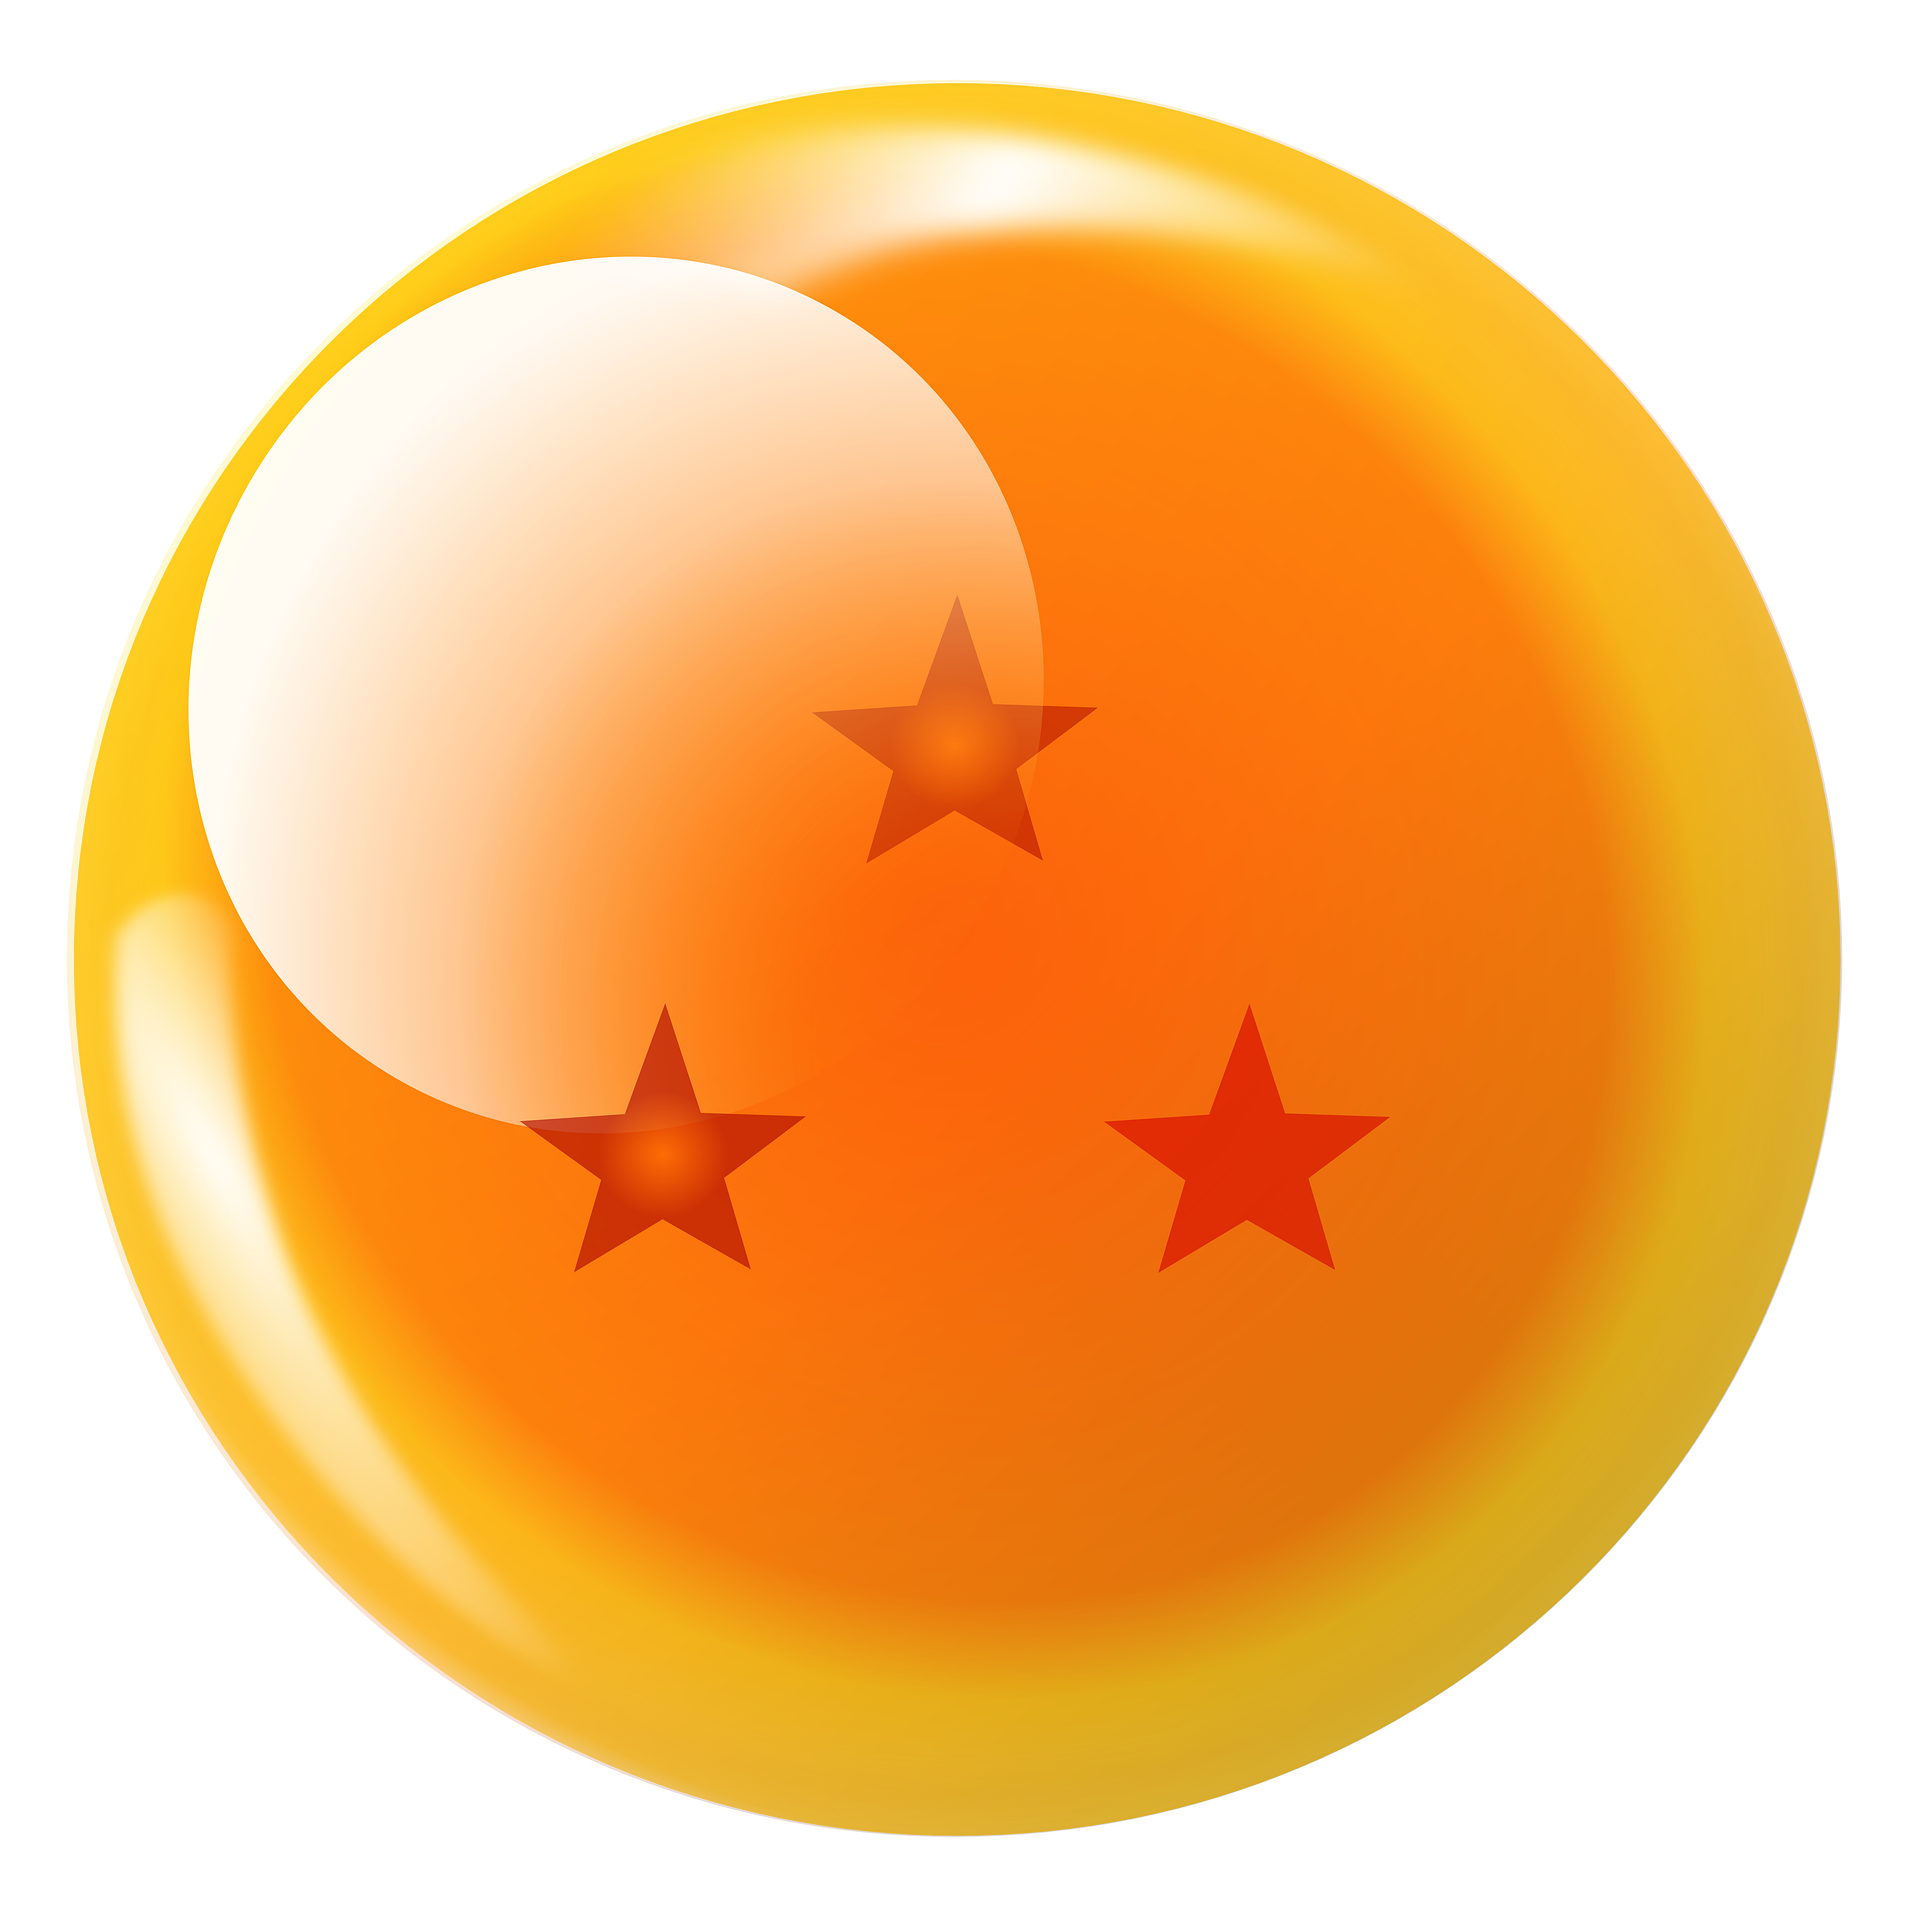

In [133]:
# 확인
from IPython.display import Image
Image("./dragonball/3성구.png", width=300, height=300)